In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set_style('white')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

boxprops = dict(linestyle='-', linewidth=2.5, color='k')
medianprops = dict(linestyle='-', linewidth=2.5, color='k')
meanprops = dict(linestyle='-', linewidth=2.5, color='r')
flierprops=dict(linestyle='', linewidth=2.5)
whiskerprops=dict(linestyle='-', linewidth=2.5)
capprops=dict(linestyle='-', linewidth=2.5)

In [4]:
import numpy as np
sdf = pd.read_csv('~/fs/clean_study_test_cvae/agg_results.csv')
sdf['avg_metrics'] = sdf[['diff_bias_metric', 'correctness_total', 'coverage_total']].mean(axis=1)
print(sdf.graphical_model.unique())
sdf['graphical_model'] = sdf.apply(lambda row: row['exp_name'].split('_')[0],axis=1)
sdf['study_name_short'] = sdf.apply(lambda row: row['exp_name'].split('_')[-2] + 'b' if 'cyl' in row['exp_name'] else row['exp_name'].split('_')[-2], axis=1)
sdf['model_name'] = sdf.apply(lambda row: row['graphical_model'] + row['study_name_short'], axis=1)
print(sdf.model_name.unique())


sdf1 = sdf[sdf.study_name.str.contains('study_1')]
sdf2 = sdf[(sdf.study_name.str.contains('study_2')) & ~(sdf.study_name.str.contains('2b')) & ~(sdf.study_name.str.contains('2c')) & ~(sdf.study_name.str.contains('2d'))]
sdf2b = sdf[sdf.study_name.str.contains('study_2b')]
sdf3 = sdf[(sdf.study_name.str.contains('tr_study_3')) & ~(sdf.study_name.str.contains('3b'))]
sdf3b = sdf[sdf.study_name.str.contains('study_3') & (sdf.study_name.str.contains('cyl'))]

sdf2c = sdf[sdf.study_name.str.contains('attr_info_bias_study_2c')]
sdf2d = sdf[sdf.study_name.str.contains('attr_info_bias_study_2d')]

sdf.study_name.unique()

KeyError: "['correctness_total', 'diff_bias_metric'] not in index"

### overcome_bias_a: 1
### overcome_bias_b: 0.11
### overcome_bias_c: 0.5 
### retain_bias_a: ? 
### retain_bias_b: [0, 0.11]
### retain_bias_c: [0, 0.5]

In [110]:
##  ['cvae3b', 'cvaeyyibw1003b', 'cvaeyyibw100gp3b', 'jcvae3b', 'jcvaeyyibw1003b', 'jcvaeyyibw100gp3b']

In [118]:
show_df = sdf3b[(sdf3b.step == 40) & (sdf3b.model_name.isin(['cvae3b', 'cvaeyyibw1003b']))]

In [119]:
show_df.groupby('model_name').agg({'diff_bias_metric': 'mean', 'overcome_bias_total': 'mean', 'retain_bias_total': 'mean', 'correctness_total': 'mean', 'coverage_total': 'mean'})

,diff_bias_metric,overcome_bias_total,retain_bias_total,correctness_total,coverage_total
model_name,,,,,
cvae3b,-0.1142,0.27905,0.39305,0.87220,0.97490
cvaeyyibw1003b,0.2281,0.56175,0.33380,0.94055,0.97745


In [120]:
show_df.groupby('model_name').agg({'overcome_bias_a': 'mean', 'overcome_bias_b': 'mean', 'overcome_bias_c': 'mean', 'retain_bias_a': 'mean', 'retain_bias_b': 'mean', 'retain_bias_c': 'mean'})

,overcome_bias_a,overcome_bias_b,overcome_bias_c,retain_bias_a,retain_bias_b,retain_bias_c
model_name,,,,,,
cvae3b,0.45425,0.0118,0.1947,0.6797,0.0429,0.1691
cvaeyyibw1003b,0.98355,0.0364,0.2429,0.6525,0.0220,0.0072


In [48]:
import numpy as np
sdf = pd.read_csv('~/fs/bias_study_trajectories_bugfix/agg_results.csv')
sdf['avg_metrics'] = sdf[['diff_bias_metric', 'correctness_total', 'coverage_total']].mean(axis=1)
print(sdf.graphical_model.unique())
sdf['graphical_model'] = sdf.apply(lambda row: row['exp_name'].split('_')[0],axis=1)
sdf['study_name_short'] = sdf.apply(lambda row: row['exp_name'].split('_')[-2] + 'b' if 'cyl' in row['exp_name'] else row['exp_name'].split('_')[-2], axis=1)
sdf['model_name'] = sdf.apply(lambda row: row['graphical_model'] + row['study_name_short'], axis=1)
print(sdf.model_name.unique())


sdf1 = sdf[sdf.study_name.str.contains('study_1')]
sdf2 = sdf[(sdf.study_name.str.contains('study_2')) & ~(sdf.study_name.str.contains('2b')) & ~(sdf.study_name.str.contains('2c')) & ~(sdf.study_name.str.contains('2d'))]
sdf2b = sdf[sdf.study_name.str.contains('study_2b')]
sdf3 = sdf[(sdf.study_name.str.contains('tr_study_3')) & ~(sdf.study_name.str.contains('3b'))]
sdf3b = sdf[sdf.study_name.str.contains('study_3') & (sdf.study_name.str.contains('cyl'))]

sdf2c = sdf[sdf.study_name.str.contains('attr_info_bias_study_2c')]
sdf2d = sdf[sdf.study_name.str.contains('attr_info_bias_study_2d')]

sdf.study_name.unique()

['scan' 'jmvae']
['cvaeyyibw1003b' 'cvaeyy3b' 'cvae3b' 'cvaeyy3' 'jcvae3b' 'cvae3'
 'cvaeyyibw1003' 'jcvaeyy3b' 'jcvaeyyibw1003b' 'jcvae3' 'jcvaeyy3'
 'jcvaeyygp3b' 'jcvaeyyibw1003' 'jcvaeyyibw100gp3' 'jcvaeyyibw100gp3b'
 'jcvaeyygp3' 'cvaeyyibw100gp3b' 'cvaeyyibw100gp3']


array(['cyl_attr_info_bias_study_3', 'tr_study_3'], dtype=object)

In [49]:
sdf3b[(sdf3b.step==40) & (sdf3b.model_name == 'cvae3b')].groupby('model_name').agg({'diff_bias_metric': 'mean', 'overcome_bias_total': 'mean', 'retain_bias_total': 'mean', 'correctness_total': 'mean', 'coverage_total': 'mean'})

,diff_bias_metric,overcome_bias_total,retain_bias_total,correctness_total,coverage_total
model_name,,,,,
cvae3b,0.1788,0.4925,0.31375,0.99265,0.94235


In [50]:
sdf3b[(sdf3b.step==40) & (sdf3b.model_name == 'cvae3b')].groupby('model_name').agg({'overcome_bias_a': 'mean', 'overcome_bias_b': 'mean', 'overcome_bias_c': 'mean'})

,overcome_bias_a,overcome_bias_b,overcome_bias_c
model_name,,,
cvae3b,0.81245,0.0442,0.2998


In [51]:
sdf3b[(sdf3b.step==40) & (sdf3b.model_name == 'cvae3b')].groupby('model_name').agg({'retain_bias_a': 'mean', 'retain_bias_b': 'mean', 'retain_bias_c': 'mean'})

,retain_bias_a,retain_bias_b,retain_bias_c
model_name,,,
cvae3b,0.56805,0.0475,0.0709


In [25]:
sdf3[sdf3.step==40].groupby('model_name').agg({'diff_bias_metric': 'mean', 'overcome_bias_total': 'mean', 'retain_bias_total': 'mean', 'correctness_total': 'mean', 'coverage_total': 'mean'})

,diff_bias_metric,overcome_bias_total,retain_bias_total,correctness_total,coverage_total
model_name,,,,,
cvae3,0.03085,0.36175,0.33080,0.91240,0.93000
cvaeyy3,-0.01205,0.29430,0.30620,0.76435,0.86535
cvaeyyibw1003,-0.02840,0.32695,0.35550,0.80455,0.88160
jcvae3,-0.06860,0.30690,0.37530,0.93325,0.94640
jcvaeyy3,0.05425,0.44435,0.39020,0.97245,0.93310
jcvaeyygp3,0.05440,0.37385,0.31945,0.98310,0.90945
jcvaeyyibw1003,0.13755,0.43395,0.29655,0.97325,0.91950
jcvaeyyibw100gp3,0.09420,0.36690,0.27275,0.97545,0.90910


No handles with labels found to put in legend.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

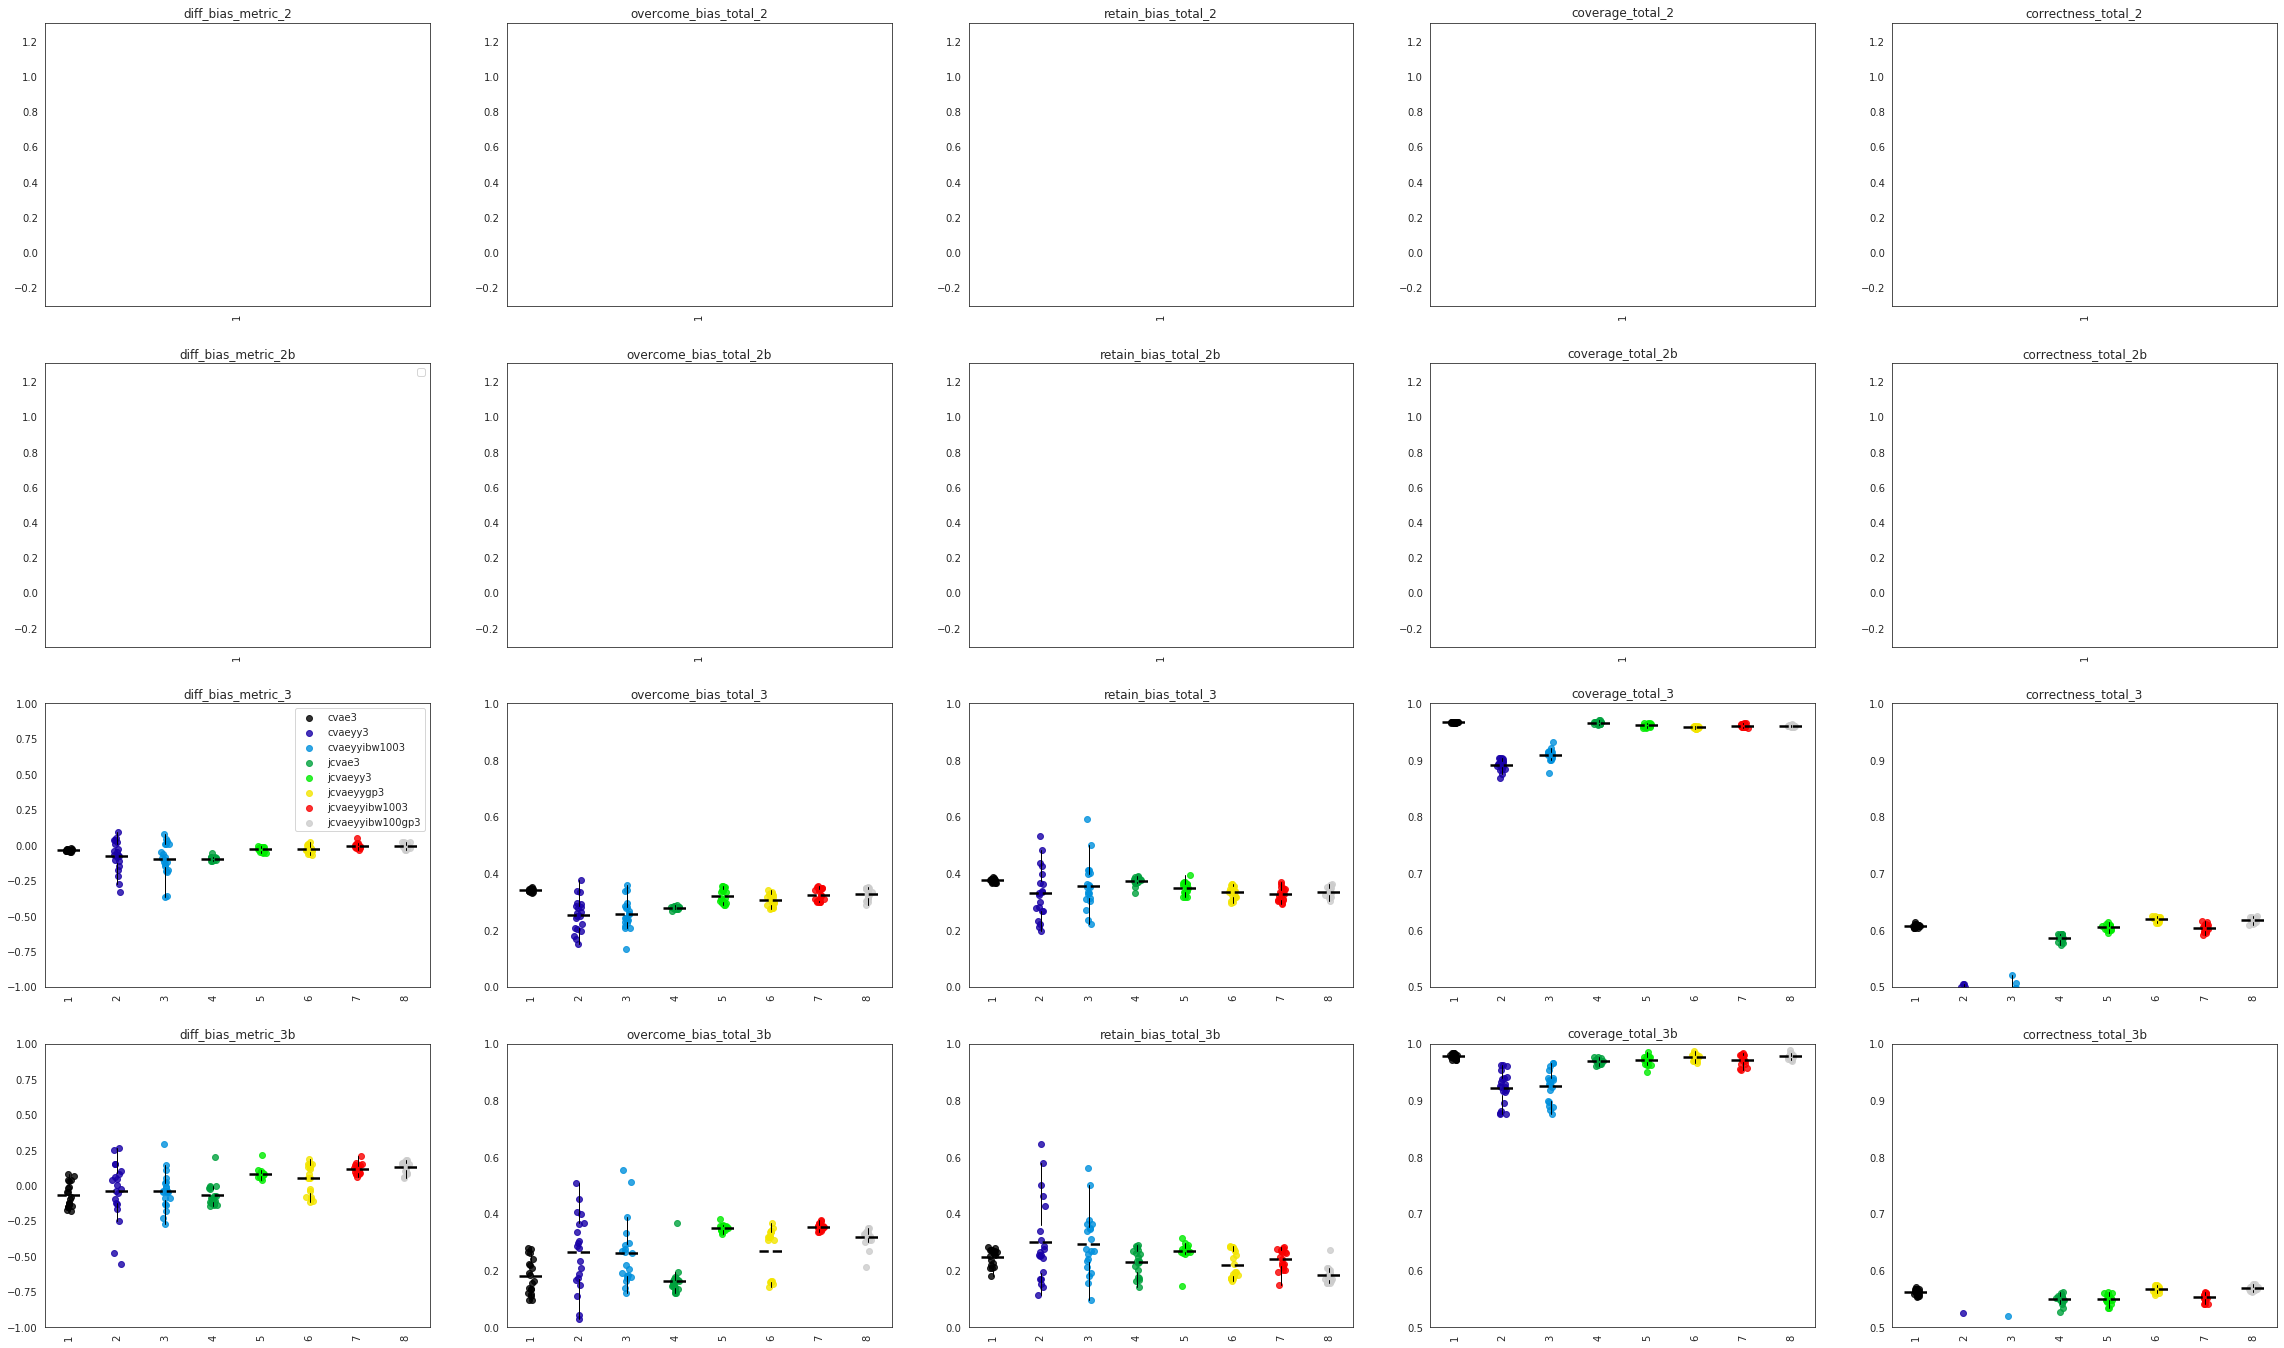

In [82]:
#sdf2[(sdf2.step==40)].boxplot(column=['overcome_bias_total'], by=['model_name'], figsize=(40, 8), layout=(1, 1), fontsize=20, rot=80, boxprops=boxprops, medianprops=medianprops, flierprops=flierprops, capprops=capprops, meanline=True, showmeans=True)
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(40, 24))
plt.grid()


columns = ['diff_bias_metric', 'overcome_bias_total', 'retain_bias_total', 'coverage_total', 'correctness_total']
low_limits = [-1, 0, 0, 0.5, 0.5]
up_limits = [1, 1, 1, 1, 1]
study_names = ['2', '2b','3', '3b']
gs = gridspec.GridSpec(len(study_names), len(columns))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for six, sn in enumerate(study_names):
        for cix, column in enumerate(columns):

            grouped = sdf[(sdf.step == 40) & (sdf.study_name_short == sn)].groupby('model_name')
            ax = plt.subplot(gs[six, cix])
            ax.set_title(column + '_' + sn)

            medianprops = dict(linestyle='', linewidth=1.5, color='black')
            meanprops = dict(linestyle='--', linewidth=2.5, color='black')


            names, vals, xs = [], [] ,[]

            for i, (name, subdf) in enumerate(grouped):
                names.append(name)
                vals.append(subdf[column].tolist())
                xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

            plt.boxplot(vals, showfliers=False, showbox=False, showmeans=True, meanline=True, showcaps=False, meanprops=meanprops, medianprops=medianprops)
            plt.grid()
            ngroup = len(vals)
            clevels = np.linspace(0., 1., ngroup)
            ax.xaxis.set_tick_params(rotation=90)
            plt.grid()

            for x, val, clevel, name in zip(xs, vals, clevels, names):
                plt.scatter(x, val, c=plt.cm.nipy_spectral(clevel), alpha=0.8, label=name)
                plt.ylim(low_limits[cix], up_limits[cix])
                plt.grid()

            if (sn == '3' or sn== '2b') and column == 'diff_bias_metric':
                plt.legend(prop={'size': 10})

### sdf[(sdf.step == 40) (sdf.study_name_short == six) ].groupby('model_name').mean()

In [65]:
import pickle
sdf3[((sdf3.model_name == 'jmvaefix1003') | (sdf3.model_name == 'gpjmvae3'))  & (sdf3.step == 40) &(sdf3.seed==0) ].exp_name
with open('/checkpoint/pjaeger/bias_study_cluster/bias_study_fix_analysis_s2s3/truecvaejmvae_cyl_attr_info_bias_study_3_0/configs.pickle', 'rb') as handle:
    x = vars(pickle.load(handle))
with open('/checkpoint/pjaeger/bias_study_cluster/bias_study_trajectories_sanity/jcvaeyyibw100gp_cyl_attr_info_bias_study_3_0/configs.pickle', 'rb') as handle:
    y = vars(pickle.load(handle))

for (k,v), (k2,v2) in zip(x.items(), y.items()):
    try:
        if x[k] !=y[k]:
            print('mismatch', k, x[k], y[k])
            
    except:
        print('fail', k ,x[k])
        try:
            print('fail 2', k, y[k])
        except:
            pass
print('test concept mismatches')
for cix in range(len(x['test_concepts'])):
    if x['test_concepts'][cix] != y['test_concepts'][cix]:
        print('mismatch', cix, x['test_concepts'][cix], y['test_concepts'][cix])
#print(y['loss_weights_dict'], y['inject_bias'])
print(y['fix_flag_5'])

mismatch exp_dir /checkpoint/pjaeger/bias_study_cluster/bias_study_fix_analysis_s2s3/truecvaejmvae_cyl_attr_info_bias_study_3_0 /checkpoint/pjaeger/bias_study_cluster/bias_study_trajectories_sanity/jcvaeyyibw100gp_cyl_attr_info_bias_study_3_0
mismatch num_val_batches 1 50
mismatch tensorboard_name 1565816617.065367 1565794953.1916244
fail p_k [tensor([0.3333, 0.3333, 0.3333]), tensor([0.3333, 0.3333, 0.3333]), tensor([0.5000, 0.5000]), tensor([0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250])]
fail 2 p_k [tensor([0.3333, 0.3333, 0.3333]), tensor([0.3333, 0.3333, 0.3333]), tensor([0.5000, 0.5000]), tensor([0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250])]
fail inject_bias [array([ 0, 11])]
fail 2 inject_bias [array([ 0, 11])]
mismatch test_dir /checkpoint/pjaeger/bias_study_cluster/bias_study_fix_analysis_s2s3/truecvaejmvae_cyl_attr_info_bias_study_3_0/test /checkpoint/pjaeger/bias_study_cluster/bias_study_trajectories_sanity/jcvaeyyibw100gp_cyl_attr_info_

In [ ]:
performing training over fold 0 on experiment /checkpoint/pjaeger/bias_study_cluster/bias_study_fix_analysis_s2s3/truecvaejmvae_cyl_attr_info_bias_study_3_0 with model jvae
loading dataset and initializing batch generators...
new train phase: loss weight dict: {'reco_x_xy': 1.0, 'reco_x_x': 0.0, 'reco_y_xy': 5.0, 'reco_y_y': 5.0, 'kl_x': 0.0, 'kl_y': 1.0, 'kl_xy': 1.0, 'gan_G_post_x': 1, 'gan_G_post_xy': 1, 'gan_G_prior': 1, 'gan_D_post_x': 1, 'gan_D_post_xy': 1, 'gan_D_prior': 1, 'inject_bias': 100.0, 'reco_x_y': 0.0}
new train phase: freeze module list: {0: ['encoder_x']}
new train phase: freezeing encoder_x.conv_1.0.0.weight
new train phase: freezeing encoder_x.conv_1.0.1.weight
new train phase: freezeing encoder_x.conv_1.0.1.bias
new train phase: freezeing encoder_x.conv_2.0.0.weight
new train phase: freezeing encoder_x.conv_2.0.1.weight
new train phase: freezeing encoder_x.conv_2.0.1.bias
new train phase: freezeing encoder_x.conv_3.0.0.weight
new train phase: freezeing encoder_x.conv_3.0.1.weight
new train phase: freezeing encoder_x.conv_3.0.1.bias
new train phase: freezeing encoder_x.conv_4.0.0.weight
new train phase: freezeing encoder_x.conv_4.0.1.weight
new train phase: freezeing encoder_x.conv_4.0.1.bias
new train phase: freezeing encoder_x.conv_5.0.weight
new train phase: freezeing encoder_x.fc0.weight
new train phase: freezeing encoder_x.fc0.bias
new train phase: freezeing encoder_x.fc1.weight
new train phase: freezeing encoder_x.fc1.bias
starting training step 1
tr. batch 1/1000 (ep. 1) fw 6.267s / bw 0.041s / total 6.308s || reco_x_xy: 8730.604 reco_x_x: 8731.601 kl_xy: 0.372 kl_y: 2.006 kl_x: 0.540 reco_y_xy: 11.372 reco_y_y: 10.967 total: 8844.675
tr. batch 2/1000 (ep. 1) fw 0.024s / bw 0.023s / total 0.046s || reco_x_xy: 8715.212 reco_x_x: 8715.533 kl_xy: 0.344 kl_y: 1.924 kl_x: 0.513 reco_y_xy: 11.321 reco_y_y: 11.239 total: 8830.280
tr. batch 3/1000 (ep. 1) fw 0.020s / bw 0.019s / total 0.039s || reco_x_xy: 8701.193 reco_x_x: 8701.332 kl_xy: 0.332 kl_y: 1.863 kl_x: 0.511 reco_y_xy: 11.271 reco_y_y: 11.178 total: 8815.633
tr. batch 4/1000 (ep. 1) fw 0.018s / bw 0.024s / total 0.042s || reco_x_xy: 8687.785 reco_x_x: 8687.527 kl_xy: 0.338 kl_y: 1.820 kl_x: 0.529 reco_y_xy: 11.361 reco_y_y: 11.318 total: 8803.336
tr. batch 5/1000 (ep. 1) fw 0.019s / bw 0.022s / total 0.041s || reco_x_xy: 8675.139 reco_x_x: 8675.499 kl_xy: 0.344 kl_y: 1.777 kl_x: 0.545 reco_y_xy: 11.240 reco_y_y: 11.596 total: 8791.442
tr. batch 6/1000 (ep. 1) fw 0.106s / bw 0.021s / total 0.127s || reco_x_xy: 8662.955 reco_x_x: 8663.226 kl_xy: 0.364 kl_y: 1.758 kl_x: 0.570 reco_y_xy: 11.136 reco_y_y: 11.289 total: 8777.205
tr. batch 7/1000 (ep. 1) fw 0.132s / bw 0.022s / total 0.154s || reco_x_xy: 8652.102 reco_x_x: 8653.497 kl_xy: 0.383 kl_y: 1.716 kl_x: 0.594 reco_y_xy: 11.189 reco_y_y: 11.162 total: 8765.955
tr. batch 8/1000 (ep. 1) fw 0.291s / bw 0.023s / total 0.314s || reco_x_xy: 8642.031 reco_x_x: 8642.619 kl_xy: 0.405 kl_y: 1.686 kl_x: 0.630 reco_y_xy: 11.099 reco_y_y: 11.213 total: 8755.686
tr. batch 9/1000 (ep. 1) fw 0.020s / bw 0.024s / total 0.044s || reco_x_xy: 8634.161 reco_x_x: 8634.944 kl_xy: 0.434 kl_y: 1.695 kl_x: 0.658 reco_y_xy: 11.070 reco_y_y: 11.279 total: 8748.036
tr. batch 10/1000 (ep. 1) fw 0.017s / bw 0.024s / total 0.042s || reco_x_xy: 8624.044 reco_x_x: 8625.189 kl_xy: 0.465 kl_y: 1.723 kl_x: 0.699 reco_y_xy: 10.902 reco_y_y: 11.085 total: 8736.168
                                
check model path! /private/home/pjaeger/tmp/pycharm_project_419/pjaeger/test_vaes/models/jvae.py
Logging to /checkpoint/pjaeger/bias_study_cluster/bias_study_fix_analysis_s2s3/truecvaejmvae_cyl_attr_info_bias_study_3_0/fold_0/exec.log
^[[39mperforming training over fold 0 on experiment /checkpoint/pjaeger/bias_study_cluster/bias_study_fix_analysis_s2s3/truecvaejmvae_cyl_attr_info_bias_study_3_0 with model jvae
^[[0m^[[39mloading dataset and initializing batch generators...
^[[0mData found!  # of images = 76342 train
Data found!  # of images = 524 val
^[[39mnew train phase: loss weight dict: {'reco_x_xy': 1.0, 'reco_x_x': 0.0, 'reco_y_xy': 5.0, 'reco_y_y': 5.0, 'kl_x': 0.0, 'kl_y': 1.0, 'kl_xy': 1.0, 'gan_G_post_x': 1, 'gan_G_post_xy': 1, 'gan_G_prior': 1, 'gan_D_post_x': 1, 'gan_D_post_xy': 1, 'gan_D_prior': 1, 'inject_bias': 100.0, 'reco_x_y': 0.0}
^[[0m^[[39mnew train phase: freeze module list: {0: ['encoder_x']}
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_1.0.0.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_1.0.1.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_1.0.1.bias
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_2.0.0.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_2.0.1.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_2.0.1.bias
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_3.0.0.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_3.0.1.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_3.0.1.bias
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_4.0.0.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_4.0.1.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_4.0.1.bias
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_5.0.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.fc0.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.fc0.bias
^[[0m^[[39mnew train phase: freezeing encoder_x.fc1.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.fc1.bias
^[[0m^[[39mstarting training step 1
^[[0m^[[39mtr. batch 1/1000 (ep. 1) fw 6.267s / bw 0.041s / total 6.308s || reco_x_xy: 8730.604 reco_x_x: 8731.601 kl_xy: 0.372 kl_y: 2.006 kl_x: 0.540 reco_y_xy: 11.372 reco_y_y: 10.967 total: 8844.675

        
tr. batch 1/1000 (ep. 1) fw 1.690s / bw 0.034s / total 1.724s || reco_x_xy: 8730.604 reco_x_x: 8731.601 kl_xy: 0.372 kl_y: 1.975 kl_x: 0.540 reco_y_xy: 11.372 reco_y_y: 11.234 total: 8845.982
tr. batch 2/1000 (ep. 1) fw 0.700s / bw 0.020s / total 0.720s || reco_x_xy: 8715.212 reco_x_x: 8715.533 kl_xy: 0.344 kl_y: 1.903 kl_x: 0.513 reco_y_xy: 11.321 reco_y_y: 11.314 total: 8830.634
tr. batch 3/1000 (ep. 1) fw 0.974s / bw 0.020s / total 0.994s || reco_x_xy: 8701.193 reco_x_x: 8701.332 kl_xy: 0.332 kl_y: 1.879 kl_x: 0.511 reco_y_xy: 11.271 reco_y_y: 11.236 total: 8815.939
tr. batch 4/1000 (ep. 1) fw 0.732s / bw 0.020s / total 0.753s || reco_x_xy: 8687.786 reco_x_x: 8687.527 kl_xy: 0.338 kl_y: 1.869 kl_x: 0.529 reco_y_xy: 11.362 reco_y_y: 11.032 total: 8801.963
tr. batch 5/1000 (ep. 1) fw 0.970s / bw 0.020s / total 0.990s || reco_x_xy: 8675.139 reco_x_x: 8675.500 kl_xy: 0.344 kl_y: 1.750 kl_x: 0.545 reco_y_xy: 11.240 reco_y_y: 11.440 total: 8790.636
tr. batch 6/1000 (ep. 1) fw 0.923s / bw 0.023s / total 0.947s || reco_x_xy: 8662.956 reco_x_x: 8663.227 kl_xy: 0.364 kl_y: 1.795 kl_x: 0.570 reco_y_xy: 11.138 reco_y_y: 11.239 total: 8777.000
        
        
                                
performing training over fold 0 on experiment /checkpoint/pjaeger/bias_study_cluster/bias_study_trajectories_sanity/jcvaeyyibw100gp_cyl_attr_info_bias_study_3_0 with model jvae
loading dataset and initializing batch generators...
new train phase: loss weight dict: {'reco_x_xy': 1.0, 'reco_x_x': 0.0, 'reco_y_xy': 5.0, 'reco_y_y': 5.0, 'kl_x': 0.0, 'kl_y': 1.0, 'kl_xy': 1.0, 'gan_G_post_x': 1, 'gan_G_post_xy': 1, 'gan_G_prior': 1, 'gan_D_post_x': 1, 'gan_D_post_xy': 1, 'gan_D_prior': 1, 'inject_bias': 100.0, 'reco_x_y': 0}
new train phase: freeze module list: {0: ['encoder_x']}
new train phase: freezeing encoder_x.conv_1.0.0.weight
new train phase: freezeing encoder_x.conv_1.0.1.weight
new train phase: freezeing encoder_x.conv_1.0.1.bias
new train phase: freezeing encoder_x.conv_2.0.0.weight
new train phase: freezeing encoder_x.conv_2.0.1.weight
new train phase: freezeing encoder_x.conv_2.0.1.bias
new train phase: freezeing encoder_x.conv_3.0.0.weight
new train phase: freezeing encoder_x.conv_3.0.1.weight
new train phase: freezeing encoder_x.conv_3.0.1.bias
new train phase: freezeing encoder_x.conv_4.0.0.weight
new train phase: freezeing encoder_x.conv_4.0.1.weight
new train phase: freezeing encoder_x.conv_4.0.1.bias
new train phase: freezeing encoder_x.conv_5.0.weight
new train phase: freezeing encoder_x.fc0.weight
new train phase: freezeing encoder_x.fc0.bias
new train phase: freezeing encoder_x.fc1.weight
new train phase: freezeing encoder_x.fc1.bias
starting training step 1
tr. batch 1/1000 (ep. 1) fw 9.704s / bw 0.028s / total 9.732s || reco_x_xy: 8730.999 reco_x_x: 8731.701 kl_xy: 0.376 kl_y: 2.020 kl_x: 0.549 reco_y_xy: 11.394 reco_y_y: 11.187 total: 8846.302
tr. batch 2/1000 (ep. 1) fw 0.588s / bw 0.023s / total 0.611s || reco_x_xy: 8714.895 reco_x_x: 8714.990 kl_xy: 0.341 kl_y: 1.901 kl_x: 0.514 reco_y_xy: 11.380 reco_y_y: 11.123 total: 8829.655
tr. batch 3/1000 (ep. 1) fw 0.425s / bw 0.031s / total 0.456s || reco_x_xy: 8700.339 reco_x_x: 8700.087 kl_xy: 0.326 kl_y: 1.854 kl_x: 0.508 reco_y_xy: 11.251 reco_y_y: 11.243 total: 8814.989
tr. batch 4/1000 (ep. 1) fw 0.250s / bw 0.023s / total 0.273s || reco_x_xy: 8687.932 reco_x_x: 8687.937 kl_xy: 0.320 kl_y: 1.873 kl_x: 0.506 reco_y_xy: 11.313 reco_y_y: 10.708 total: 8800.228
tr. batch 5/1000 (ep. 1) fw 0.016s / bw 0.024s / total 0.039s || reco_x_xy: 8674.999 reco_x_x: 8675.420 kl_xy: 0.323 kl_y: 1.751 kl_x: 0.516 reco_y_xy: 11.237 reco_y_y: 11.330 total: 8789.904
tr. batch 6/1000 (ep. 1) fw 0.017s / bw 0.025s / total 0.042s || reco_x_xy: 8663.445 reco_x_x: 8663.795 kl_xy: 0.330 kl_y: 1.770 kl_x: 0.525 reco_y_xy: 11.266 reco_y_y: 11.159 total: 8777.672
tr. batch 7/1000 (ep. 1) fw 0.016s / bw 0.030s / total 0.046s || reco_x_xy: 8652.052 reco_x_x: 8653.096 kl_xy: 0.357 kl_y: 1.693 kl_x: 0.557 reco_y_xy: 11.190 reco_y_y: 11.184 total: 8765.973
tr. batch 8/1000 (ep. 1) fw 0.015s / bw 0.017s / total 0.032s || reco_x_xy: 8642.465 reco_x_x: 8643.123 kl_xy: 0.381 kl_y: 1.760 kl_x: 0.592 reco_y_xy: 11.113 reco_y_y: 11.018 total: 8755.262
tr. batch 9/1000 (ep. 1) fw 0.014s / bw 0.043s / total 0.057s || reco_x_xy: 8633.540 reco_x_x: 8634.233 kl_xy: 0.413 kl_y: 1.762 kl_x: 0.627 reco_y_xy: 11.053 reco_y_y: 11.076 total: 8746.359
tr. batch 10/1000 (ep. 1) fw 0.014s / bw 0.027s / total 0.041s || reco_x_xy: 8624.723 reco_x_x: 8625.584 kl_xy: 0.445 kl_y: 1.714 kl_x: 0.660 reco_y_xy: 10.995 reco_y_y: 10.980 total: 8736.758
                                
                                
Namespace(apply_test_config_mods=False, attribute_decode='khot', attribute_encode='nested_khot', attribute_info_pickle_name='experiments/clevr/vae_exp/cyl_attr_info_bias_study_3.pickle', batch_size=128, bn_stats_mode='track', check_pretrained_model=True, checkpoint_name='last_checkpoint.pth', crossover=False, data_dir='/private/home/pjaeger/data/clevr/one_object', dataset_source='experiments/clevr', do_val=True, eval_classifier_model='eval_classifier.py', eval_classifier_params_path='/checkpoint/pjaeger/tests/clevr_test_eval_final/fold_0/last_checkpoint.pth', exec_dir='/private/home/pjaeger/tmp/pycharm_project_419/pjaeger', exp_dir='/checkpoint/pjaeger/bias_study_cluster/bias_study_trajectories_sanity/jcvaeyyibw100gp_cyl_attr_info_bias_study_3_0', fix_flag_1=True, fix_flag_2=True, fix_flag_3=True, fix_flag_4=True, fix_flag_5=True, folds=[0], freeze_module_list=['encoder_x_0'], gan_loss=False, graphical_model='jmvae', img_size=64.0, info_df_name='info_df.csv', loss_agg='sum', missing_attr_mode='dropout', mode='train_test', model='jvae', model_group='vae', n_features=32, n_input_channels=3, n_pooling=4.0, n_samples_per_val=5, n_test_samples_per_concept=500, no_hold_out_test_set=False, norm='batch_norm', num_steps=40, num_train_batches=1000, num_train_phases=1, num_val_batches=50, num_workers=40, perceptual_reco=False, relu='relu', results_root_path='/private/home/pjaeger/fs', save_path='/checkpoint/pjaeger/', seed=0, show_n_test_concepts=10, show_n_test_samples_per_concept=10, slurm_job_id=None, split_unknown_concepts_in_training=True, tensorboard_name='1565794953.1916244', test_monitor_interval=5, train_sample_mode='rsample', use_stored_settings=False, val_sample_mode='sample', weight_decay=0.0, weight_gan_D_post_x=1, weight_gan_D_post_x_2=1, weight_gan_D_post_xy=1, weight_gan_D_post_xy_2=1, weight_gan_D_prior=1, weight_gan_D_prior_2=1, weight_gan_G_post_x=1, weight_gan_G_post_x_2=1, weight_gan_G_post_xy=1, weight_gan_G_post_xy_2=1, weight_gan_G_prior=1, weight_gan_G_prior_2=1, weight_inject_bias=100.0, weight_inject_bias_2=1, weight_kl_x=0.0, weight_kl_x_2=1, weight_kl_xy=1.0, weight_kl_xy_2=1, weight_kl_y=1.0, weight_kl_y_2=1, weight_reco_x_x=0.0, weight_reco_x_x_2=1, weight_reco_x_xy=1.0, weight_reco_x_xy_2=1, weight_reco_x_y=0, weight_reco_x_y_2=0, weight_reco_y_xy=5.0, weight_reco_y_xy_2=5, weight_reco_y_y=5.0, weight_reco_y_y_2=5, write_results_to_pickle=True, x_dropx=False, x_dropxy=False, z_dim=32)
check model path! /private/home/pjaeger/tmp/pycharm_project_419/pjaeger/models/jvae.py
Logging to /checkpoint/pjaeger/bias_study_cluster/bias_study_trajectories_sanity/jcvaeyyibw100gp_cyl_attr_info_bias_study_3_0/fold_0/exec.log
^[[39mperforming training over fold 0 on experiment /checkpoint/pjaeger/bias_study_cluster/bias_study_trajectories_sanity/jcvaeyyibw100gp_cyl_attr_info_bias_study_3_0 with model jvae
^[[0m^[[39mloading dataset and initializing batch generators...
^[[0mData found!  # of images = 75435 train
Data found!  # of images = 44971 val
^[[39mnew train phase: loss weight dict: {'reco_x_xy': 1.0, 'reco_x_x': 0.0, 'reco_y_xy': 5.0, 'reco_y_y': 5.0, 'kl_x': 0.0, 'kl_y': 1.0, 'kl_xy': 1.0, 'gan_G_post_x': 1, 'gan_G_post_xy': 1, 'gan_G_prior': 1, 'gan_D_post_x': 1, 'gan_D_post_xy': 1, 'gan_D_prior': 1, 'inject_bias': 100.0, 'reco_x_y': 0}
^[[0m^[[39mnew train phase: freeze module list: {0: ['encoder_x']}
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_1.0.0.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_1.0.1.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_1.0.1.bias
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_2.0.0.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_2.0.1.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_2.0.1.bias
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_3.0.0.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_3.0.1.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_3.0.1.bias
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_4.0.0.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_4.0.1.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_4.0.1.bias
^[[0m^[[39mnew train phase: freezeing encoder_x.conv_5.0.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.fc0.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.fc0.bias
^[[0m^[[39mnew train phase: freezeing encoder_x.fc1.weight
^[[0m^[[39mnew train phase: freezeing encoder_x.fc1.bias
^[[0m^[[39mstarting training step 1
^[[0m^[[39mtr. batch 1/1000 (ep. 1) fw 9.704s / bw 0.028s / total 9.732s || reco_x_xy: 8730.999 reco_x_x: 8731.701 kl_xy: 0.376 kl_y: 2.020 kl_x: 0.549 reco_y_xy: 11.394 reco_y_y: 11.187 total: 8846.302
^[[0m^[[39mtr. batch 2/1000 (ep. 1) fw 0.588s / bw 0.023s / total 0.611s || reco_x_xy: 8714.895 reco_x_x: 8714.990 kl_xy: 0.341 kl_y: 1.901 kl_x: 0.514 reco_y_xy: 11.380 reco_y_y: 11.123 total: 8829.655

In [41]:
sdf[(sdf.step == 40) (sdf.study_name_short == six) ].groupby('model_name').mean()

,Unnamed: 0,Unnamed: 0.1,gan_loss,n_features,step,perc_reco,x_dropx,x_dropxy,seed,correctness_shape,...,retain_bias_b,retain_bias_c,retain_bias_total,retain_bias_0_unsp.,retain_bias_1_unsp.,retain_bias_2_unsp.,retain_bias_3_unsp.,avg_standard_metrics,diff_bias_metric,avg_metrics
model_name,,,,,,,,,,,,,,,,,,,,,
jmvae2,1650.85,0.0,False,32.0,40.0,False,False,True,9.5,0.99910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.97195,NaN,0.971975
jmvae2b,1681.30,0.0,False,32.0,40.0,False,False,True,9.5,0.99800,...,0.0144,0.0131,0.08315,0.15195,0.01375,NaN,NaN,0.97005,NaN,0.970025
jmvae3,1585.30,0.0,False,32.0,40.0,False,False,True,9.5,0.99770,...,0.0176,0.0445,0.15075,0.27000,0.03105,NaN,NaN,0.96850,0.38820,0.774950
jmvae3b,1662.95,0.0,False,32.0,40.0,False,False,True,9.5,0.99715,...,0.0213,0.0338,0.13390,0.23980,0.02755,NaN,NaN,0.96790,0.30450,0.746750
jmvaefix2,1718.25,0.0,False,32.0,40.0,False,False,False,9.5,0.99910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.97145,NaN,0.971475
jmvaefix2b,1576.10,0.0,False,32.0,40.0,False,False,False,9.5,0.99625,...,0.0148,0.0470,0.11345,0.19550,0.03090,NaN,NaN,0.96905,NaN,0.969100
jmvaefix3,1633.05,0.0,False,32.0,40.0,False,False,False,9.5,0.99605,...,0.0223,0.1006,0.22505,0.38795,0.06145,NaN,NaN,0.96885,0.27225,0.736600
jmvaefix3b,1714.65,0.0,False,32.0,40.0,False,False,False,9.5,0.99520,...,0.0264,0.0934,0.22020,0.38015,0.05990,NaN,NaN,0.96785,0.15295,0.696150
scan2,1704.85,0.0,False,32.0,40.0,False,False,False,9.5,0.74270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88230,NaN,0.882350


No handles with labels found to put in legend.
No handles with labels found to put in legend.


KeyError: 'retain_bias_spec'

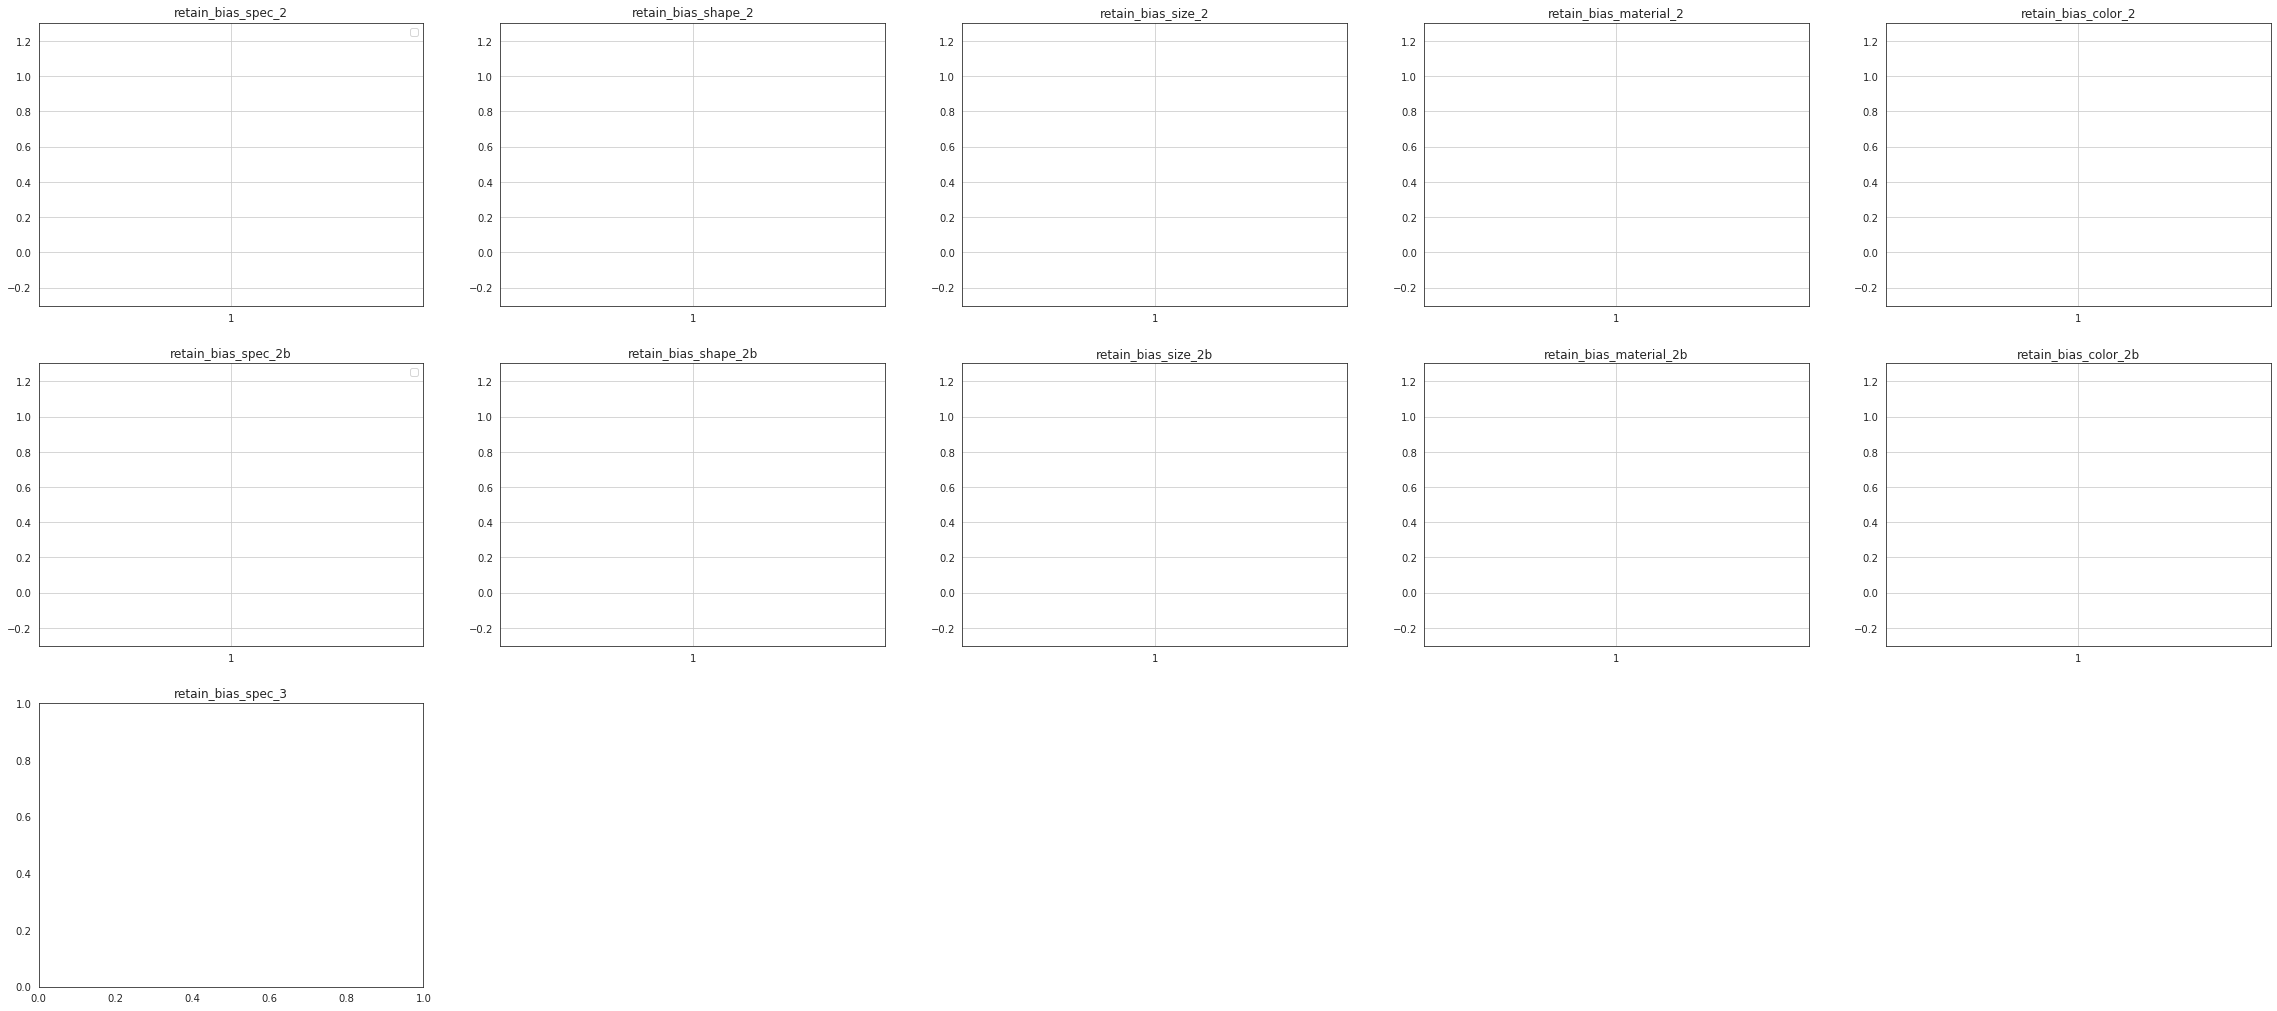

In [30]:
#sdf2[(sdf2.step==40)].boxplot(column=['overcome_bias_total'], by=['model_name'], figsize=(40, 8), layout=(1, 1), fontsize=20, rot=80, boxprops=boxprops, medianprops=medianprops, flierprops=flierprops, capprops=capprops, meanline=True, showmeans=True)
import matplotlib.gridspec as gridspec
plt.figure(figsize=(40, 24))
plt.grid()

columns = ['retain_bias_spec', 'retain_bias_shape', 'retain_bias_size', 'retain_bias_material', 'retain_bias_color']
limits = [1, 0.2, 0.6]
#study_names = ['2', '2b', '3', '3b']
gs = gridspec.GridSpec(len(study_names), len(columns))

for six, sn in enumerate(study_names):
    for cix, column in enumerate(columns):
            
        grouped = sdf[(sdf.step == 40) & (sdf.study_name_short == sn)].groupby('model_name')
        ax = plt.subplot(gs[six, cix])
        ax.set_title(column + '_' + sn)
        
        medianprops = dict(linestyle='', linewidth=1.5, color='black')
        meanprops = dict(linestyle='--', linewidth=2.5, color='black')
        
        
        names, vals, xs = [], [] ,[]

        for i, (name, subdf) in enumerate(grouped):
            names.append(name)
            vals.append(subdf[column].tolist())
            xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

        plt.boxplot(vals, showfliers=False, showbox=False, showmeans=True, meanline=True, showcaps=False, meanprops=meanprops, medianprops=medianprops)
        ngroup = len(vals)
        clevels = np.linspace(0., 1., ngroup)
        plt.grid()

        for x, val, clevel, name in zip(xs, vals, clevels, names):
            plt.scatter(x, val, c=plt.cm.nipy_spectral(clevel), alpha=0.8, label=name)
            if column == ('diff_bias_metric'):
                plt.ylim(-1,1)
            else:
                plt.ylim(0, limits[cix])
            plt.grid()
        
        if (sn == '2' or sn== '2b') and cix == 0:
            plt.legend()

## Previous Steps <br>

### ablations on jmvae_fix
### y_loss weight sweep

## Next Steps <br>

### try to upweight retain_bias_penalty for stabilization
### do some hyper parameter sweeps for scan

In [6]:
def get_bandplot(plot_df, q, plotv, color='b', linestyle='-', errorbands=False):
    
    group = plot_df.query(q).groupby('step')
    plot_df = group.agg({'model_name' : 'first', plotv: 'mean'})
    x = plot_df.index.tolist()
    y = plot_df[plotv].tolist()
    plt.plot(x, y, label='{}'.format(plot_df.model_name.tolist()[0]), color=color, linewidth=3, linestyle=linestyle)
    if errorbands:
        y_err = group.agg({'model_name' : 'first', plotv: 'std'})[plotv].tolist()
        plt.fill_between(x, [yix - yerrix for yix, yerrix in zip(y, y_err)], [yix + yerrix for yix, yerrix in zip(y, y_err)], color=color, alpha=0.1)

seaborn.set_context("paper", font_scale=2) 

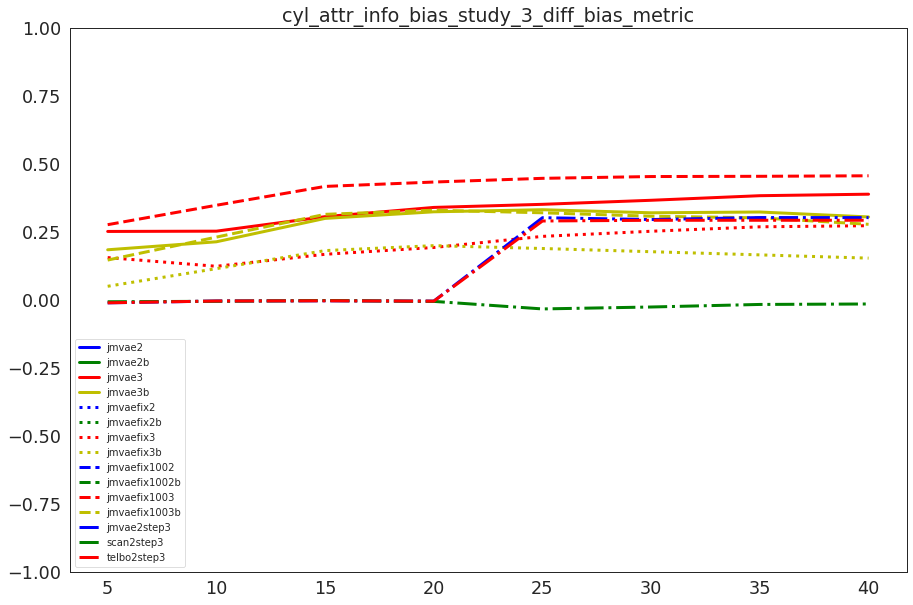

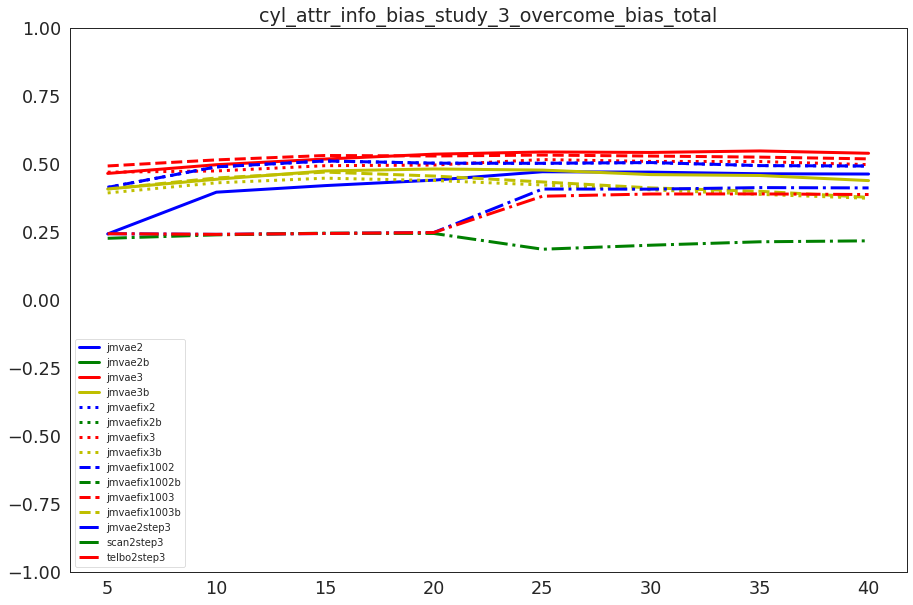

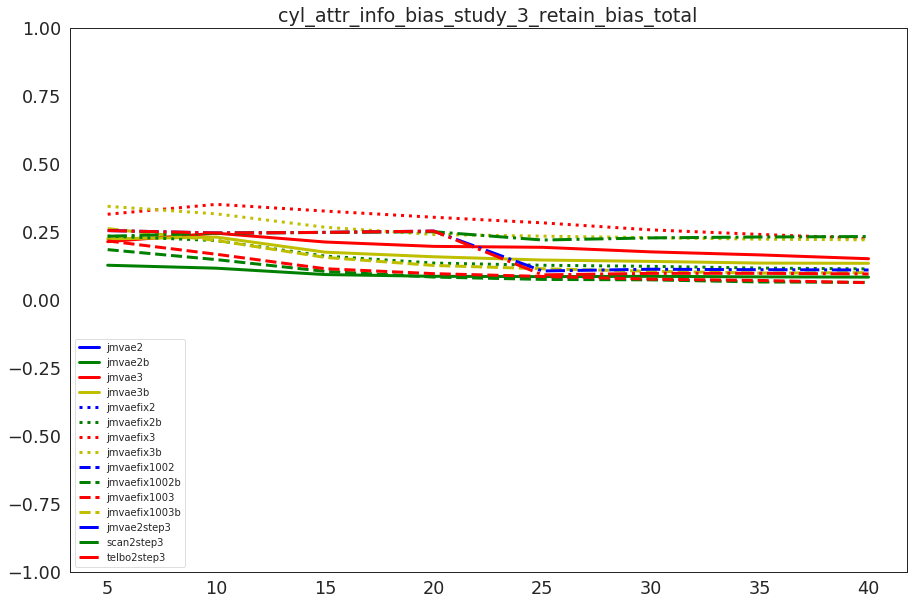

In [11]:
d = sdf
clevels = np.linspace(0., 1., 12)
colors = [plt.cm.nipy_spectral(clevel) for clevel in clevels]
for p in ['diff_bias_metric', 'overcome_bias_total', 'retain_bias_total']:
    plt.figure(figsize=(15, 10))
    get_bandplot(d, q="model_name == 'jmvae2'", plotv=p, color='b', linestyle='-')
    get_bandplot(d, q="model_name == 'jmvae2b'", plotv=p, color='g', linestyle='-')
    get_bandplot(d, q="model_name == 'jmvae3'", plotv=p, color='r', linestyle='-')
    get_bandplot(d, q="model_name == 'jmvae3b'", plotv=p, color='y', linestyle='-')
    get_bandplot(d, q="model_name == 'jmvaefix2'", plotv=p, color='b', linestyle=':')
    get_bandplot(d, q="model_name == 'jmvaefix2b'", plotv=p, color='g', linestyle=':')
    get_bandplot(d, q="model_name == 'jmvaefix3'", plotv=p, color='r', linestyle=':')
    get_bandplot(d, q="model_name == 'jmvaefix3b'", plotv=p, color='y', linestyle=':')
    get_bandplot(d, q="model_name == 'jmvaefix1002'", plotv=p, color='b', linestyle='--')
    get_bandplot(d, q="model_name == 'jmvaefix1002b'", plotv=p, color='g', linestyle='--')
    get_bandplot(d, q="model_name == 'jmvaefix1003'", plotv=p, color='r', linestyle='--')
    get_bandplot(d, q="model_name == 'jmvaefix1003b'", plotv=p, color='y', linestyle='--')
    get_bandplot(d, q="model_name == 'jmvae2step3'", plotv=p, color='b', linestyle='-.')
    get_bandplot(d, q="model_name == 'scan2step3'", plotv=p, color='g', linestyle='-.')
    get_bandplot(d, q="model_name == 'telbo2step3'", plotv=p, color='r', linestyle='-.')
    plt.legend( prop={'size': 10})
    plt.ylim(-1, 1)
    plt.title(d.study_name.tolist()[0] + '_' + p)

In [ ]:
# retain better with time, overcome worse.
# not using y for the grounding dist. is not a good idea (scan). And not training ydec / rec y during first phase for qxy effectively ignores ys in input and falls back to scan.